# Q3

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('face.jpg')[:,:,::-1]

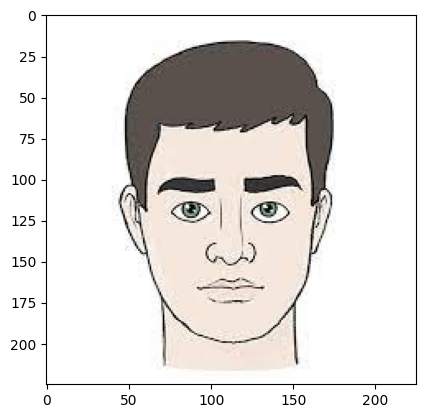

In [4]:
plt.imshow(image)

In [1]:
def compare(seed,pixel):
    a = np.mean(seed)
    b = np.mean(pixel)
    t = 10
    if max(a,b) - min(a,b) <= t:
        return True
    return False

def segment(image):
    segmented_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    seed=[110,85]
    x,y=image.shape[0:2]
    stack = [seed]  # Initialize a stack with the start node
    visited = np.zeros((x,y))  # Initialize a set to keep track of visited nodes

    while len(stack)>0:
        currentNode = stack.pop()  # Get the top node from the stack
        # visited.add(currentNode)
        visited[currentNode[0], currentNode[1]]=1
        if compare(image[seed[0],seed[1]], image[currentNode[0], currentNode[1]]):
            cv2.circle(segmented_image, [currentNode[1],currentNode[0]], 1, (255,0,0), 1)
            neighbors = [[currentNode[0]-1, currentNode[1]], [currentNode[0]+1,currentNode[1]],
                         [currentNode[0], currentNode[1]-1],[currentNode[0],currentNode[1]+1],
                         [currentNode[0]-1, currentNode[1]-1],[currentNode[0]+1, currentNode[1]+1],
                         [currentNode[0]-1, currentNode[1]+1],[currentNode[0]+1, currentNode[1]-1]
                         ] # Get the neighbors of the current node

            for neighbor in neighbors:
                if -1<neighbor[0]<x and -1<neighbor[1]<y:
                    if visited[neighbor[0], neighbor[1]]==0:
                        stack.append(neighbor)

    

    return segmented_image

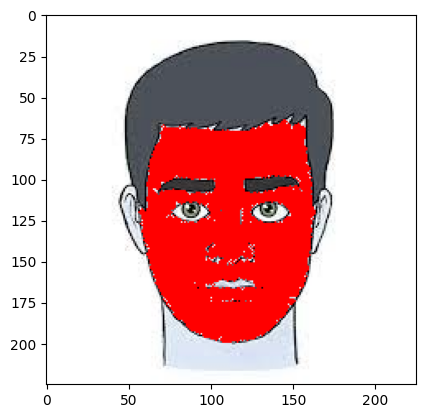

In [102]:
segmented_image = segment(image)
plt.imshow(segmented_image)